<center>

# Web Intelligence

# Who will win the Tennis Australian Open 2020?

## 04 Validating The Prediction Model

### Riccardo Spolaor (864877)

</center>

In [8]:
%matplotlib inline

import numpy as np
import pandas as pd
import python_files.ValidationOperations as valop

In [9]:
dataframe = pd.read_csv('./datasets/dataframe0.csv', low_memory = False)

In [10]:
dataframe.head(10)

,Winner,csvID,ATP,Location,Tournament,Series,Court,Round,Best of,PlayedA,...,5_5MeanA,5_setsMeanA,5_1MeanB,5_2MeanB,5_3MeanB,5_4MeanB,5_5MeanB,5_setsMeanB,HandA,HandB
0,0,0,1.0,2,0,0,1,0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,1,0,1.0,2,0,0,1,0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0,0,1.0,2,0,0,1,0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,1,0,1.0,2,0,0,1,0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,0,0,1.0,2,0,0,1,0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
5,1,0,1.0,2,0,0,1,0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
6,0,0,1.0,2,0,0,1,0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
7,1,0,1.0,2,0,0,1,0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
8,0,0,1.0,2,0,0,1,0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
9,1,0,1.0,2,0,0,1,0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


Best Max csvID: 5 - Accuracy: 0.7353868542323551
Wall time: 2min 28s


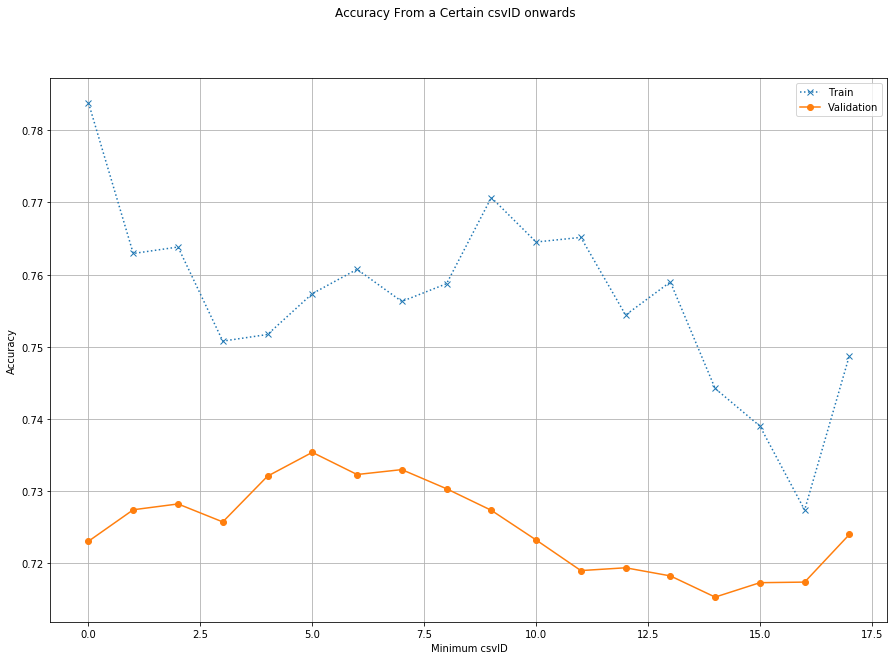

In [4]:
%%time
best_dataframe_split_index = valop.get_best_dataframe_split(dataframe)

In [5]:
dataframe = dataframe[dataframe['csvID'] >= best_dataframe_split_index]

dataframe.head()

,Winner,csvID,ATP,Location,Tournament,Series,Court,Round,Best of,PlayedA,...,5_3MeanA,5_4MeanA,5_5MeanA,5_setsMeanA,5_1MeanB,5_2MeanB,5_3MeanB,5_4MeanB,5_5MeanB,5_setsMeanB
14464,0,5,1.0,2,0,0,1,0,3.0,85,...,2.8,0.4,0.6,1.7,5.3,4.0,1.3,0.1,0.1,1.0
14465,1,5,1.0,2,0,0,1,0,3.0,14,...,3.3,0.3,0.6,1.3,4.4,4.5,0.4,0.0,0.0,0.4
14466,0,5,1.0,2,0,0,1,0,3.0,237,...,3.5,1.9,0.9,1.5,3.7,4.6,2.3,0.6,0.0,1.0
14467,1,5,1.0,2,0,0,1,0,3.0,148,...,2.9,0.0,0.0,0.9,5.3,5.1,1.3,0.0,0.0,1.3
14468,0,5,1.0,2,0,0,1,0,3.0,151,...,2.2,0.0,0.0,1.3,4.9,4.8,2.2,0.7,0.6,1.4


Best Max Depth: 11 - Accuracy: 0.7304865243262163
Best Max Features: 37 - Accuracy: 0.7339866993349667
Wall time: 1min 29s


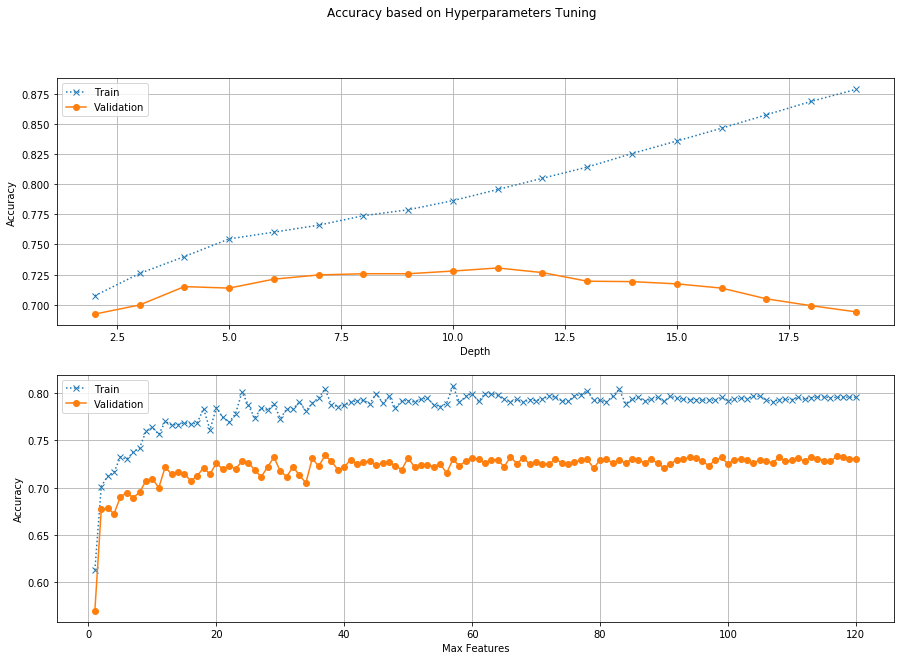

In [11]:
%%time
tree_best_features = valop.validate_tree_classifier(dataframe)

Wall time: 7.88 s


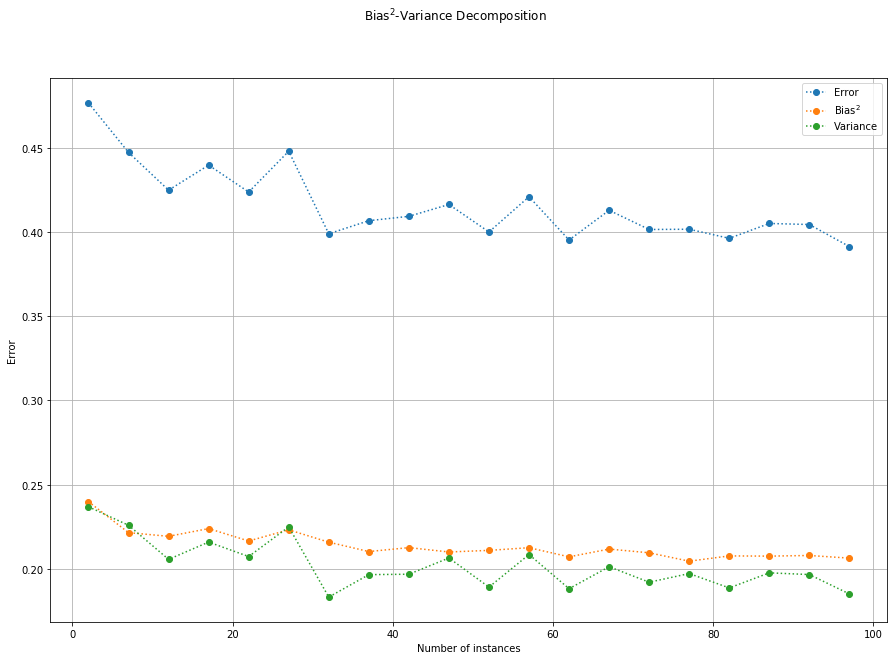

In [7]:
%%time
from sklearn.tree import DecisionTreeClassifier
valop.plot_estimator_variance_bias_decomposition(dataframe, DecisionTreeClassifier(max_depth = tree_best_features['depth'], 
                                                             max_features = tree_best_features['max_features']))

# IL BIAS e LA VARIANZA SONO PIUTTOSTO BASSI PER L'ALBERO CHE ABBIAMO COSTRUITO

Best Number of Estimators: 50 - Accuracy: 0.6941540364986081
Wall time: 1min 21s


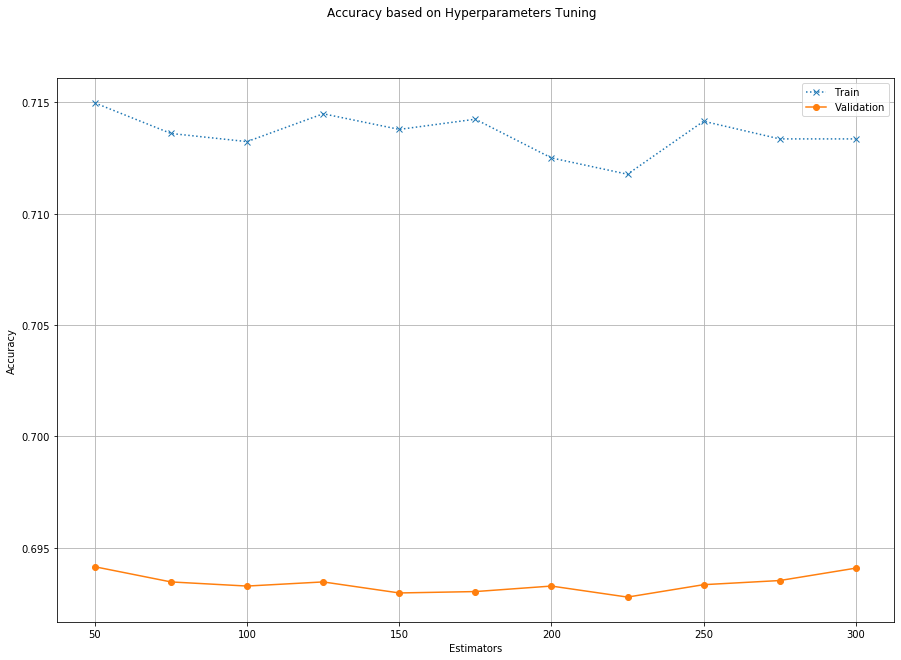

In [8]:
%%time
bagged_tree_best_n_estimators = valop.validate_bagged_tree_classifier(dataframe, tree_best_features)

Wall time: 26.1 s


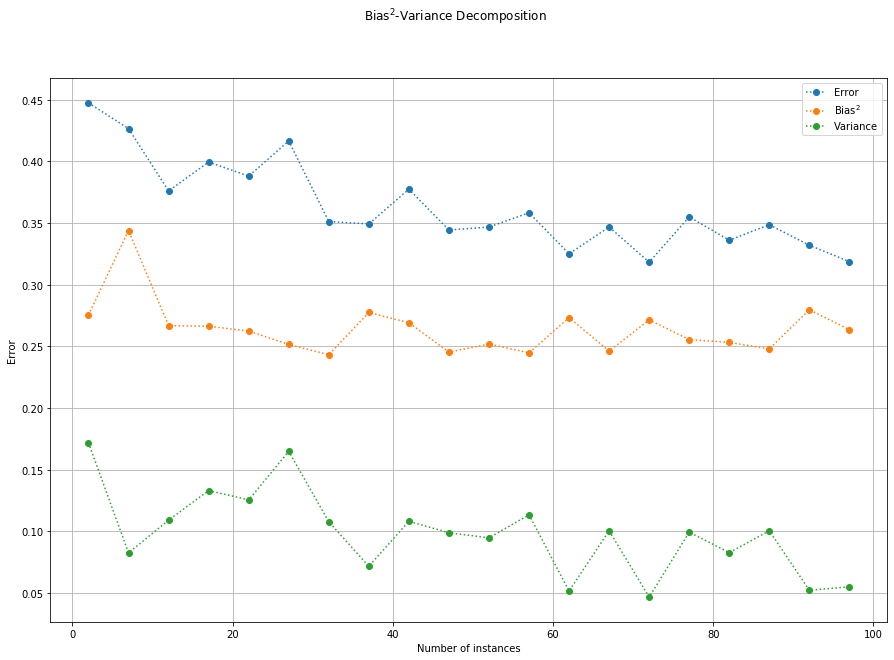

In [10]:
%%time
from sklearn.ensemble import BaggingClassifier

valop.plot_estimator_variance_bias_decomposition(dataframe,
    BaggingClassifier(DecisionTreeClassifier(max_depth = tree_best_features['depth'],
                                                  max_features = tree_best_features['max_features']), 
                      n_estimators=bagged_tree_best_n_estimators, n_jobs = -1), n_tests = 3)

#IL BAGGING RIDUCE UN PO' LA VARIANZA, MA PARE AUMENTARE IL BIAS

Best Number of Estimators: 5 - Accuracy: 0.6916176925456232
Wall time: 16.5 s


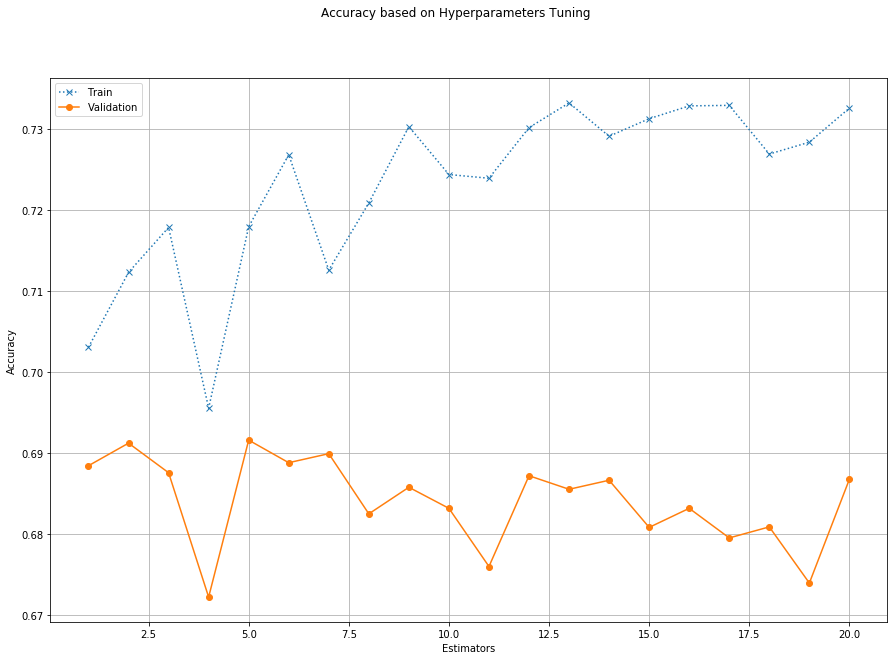

In [11]:
%%time
boosted_tree_best_n_estimators = valop.get_best_boosted_tree_n_estimators(dataframe, tree_best_features)

Wall time: 9.47 s


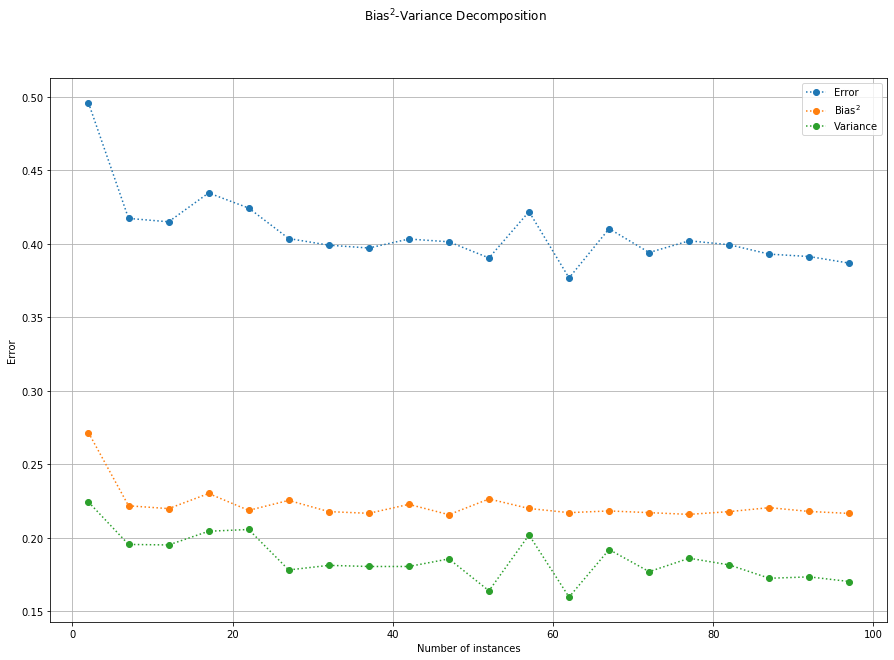

In [12]:
%%time
from sklearn.ensemble import AdaBoostClassifier

valop.plot_estimator_variance_bias_decomposition(dataframe,
    AdaBoostClassifier(DecisionTreeClassifier(max_depth = tree_best_features['depth'],
                                                  max_features = tree_best_features['max_features']), 
                      n_estimators=boosted_tree_best_n_estimators), n_tests = 10)

# LA BIAS RIMANE PIù O MENO INVARIATA, IL TUNING DEGLI IPERPARAMETRI E' STATO EFFICIENTE

Best Estimators Number 300 - Accuracy: 0.7408120406020301
Best Depth 13 - Accuracy: 0.7427954731069887
Wall time: 4min 40s


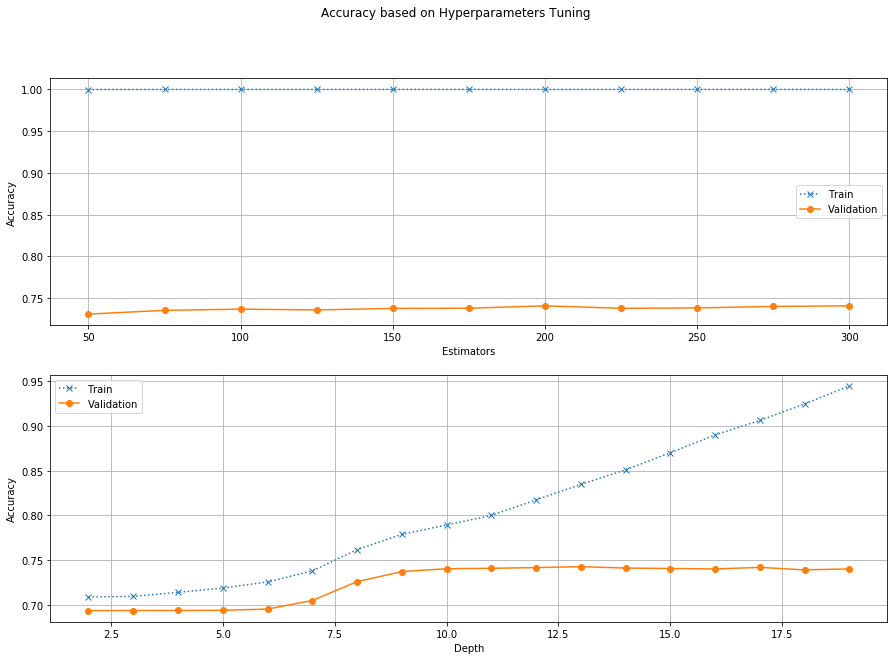

In [12]:
%%time
forest_best_features = valop.validate_forest_classifier(dataframe)

#Miglioramento dell'accuratezza!

Wall time: 34 s


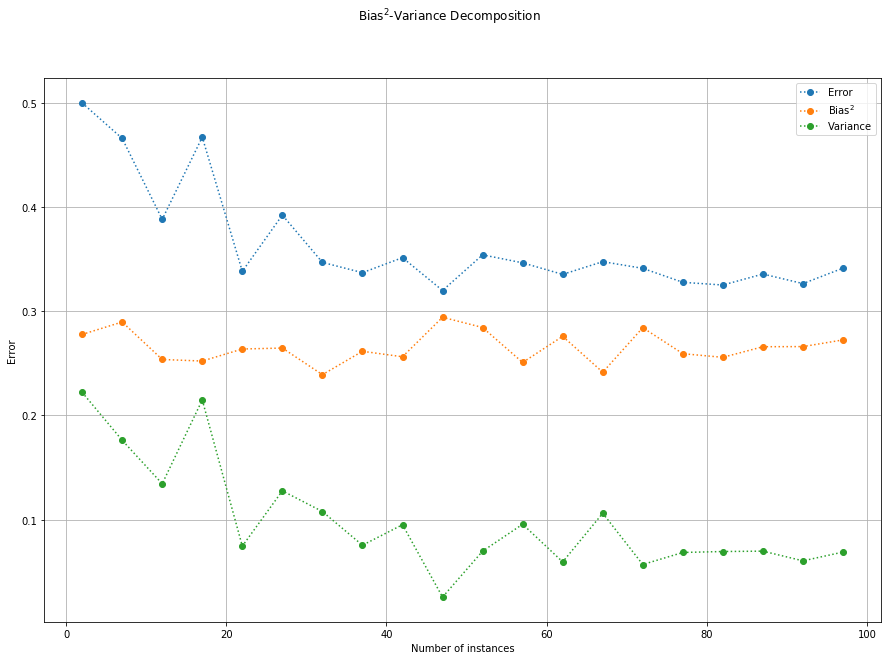

In [13]:
%%time
from sklearn.ensemble import RandomForestClassifier
valop.plot_estimator_variance_bias_decomposition(dataframe,
                                           RandomForestClassifier(n_estimators = forest_best_features['n_estimators']),
                                                                  n_tests = 3)

# LA BIAS CRESCE DI POCO, FORSE QUESTO PORTA AD UN PEGGIORAMENTO DELL'ACCURATEZZA

Wall time: 34.1 s


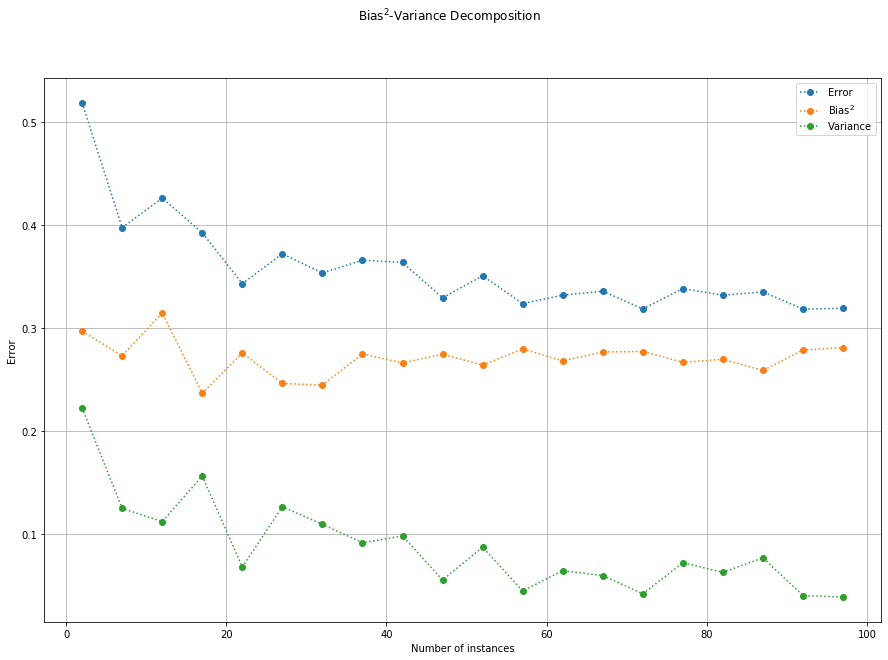

In [14]:
%%time
valop.plot_estimator_variance_bias_decomposition(dataframe,
                                                 RandomForestClassifier(n_estimators = forest_best_features['n_estimators'],
                                                                 max_depth = forest_best_features['max_depth']),
                                                                  n_tests = 3)

# LA FORESTA COL TUNING DEI PARAMETRI PORTA AD UN RISULTATO SIMILE RISPETTO ALL'ALBERO, PROBABILMENTE PERCHé LA BIAS CRESCE UN PO'
# MENTRE LA VARIANZA DIMINUISCE

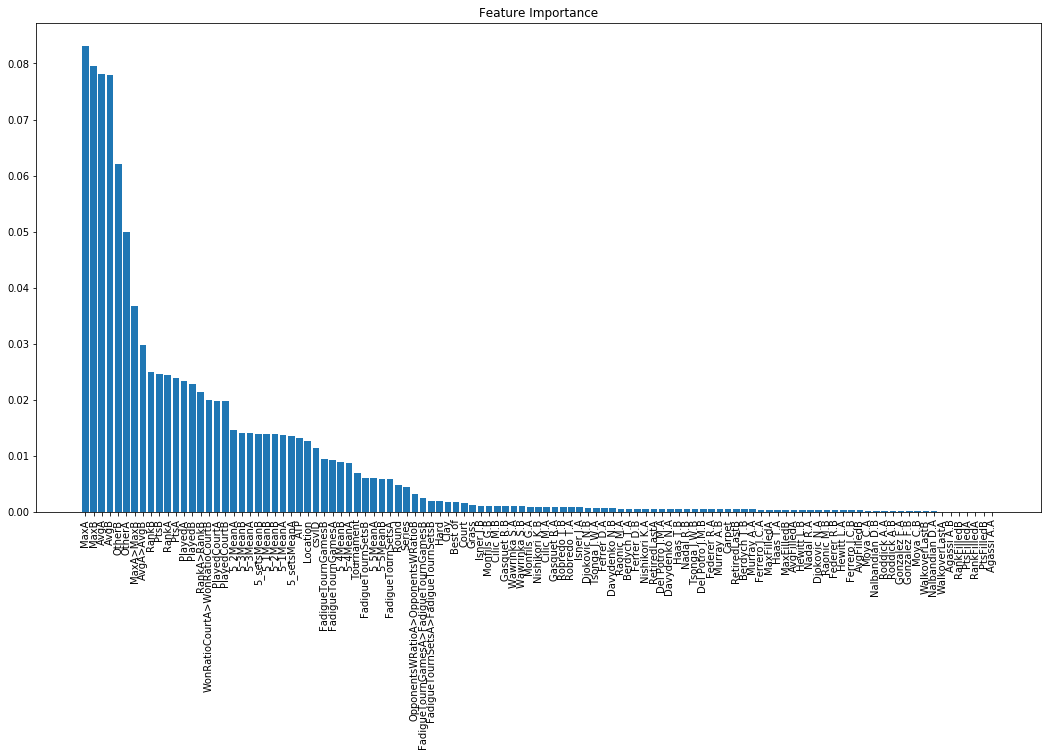

Wall time: 25.9 s


In [14]:
%%time

import matplotlib.pyplot as plt

x = dataframe.loc[:, dataframe.columns != 'Winner']
y = dataframe['Winner']

rf = RandomForestClassifier(n_estimators = forest_best_features['n_estimators'], max_depth = forest_best_features['max_depth'])

rf.fit(x,y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = [x.columns[i] for i in indices]

plt.figure(figsize=(18,9))
plt.title("Feature Importance")
plt.bar(range(x.shape[1]), importances[indices])
plt.xticks(range(x.shape[1]), features, rotation=90)
plt.show()

In [19]:
%%time
from sklearn.feature_selection import RFE

#df = df.head(1000)



selector = RFE(rf, step=20, n_features_to_select=None)

selector.fit(x,y)
selector.support_

NameError: name 'df' is not defined

In [35]:
features = x.columns.values[selector.support_]

features = np.append(features,['Winner'])

print('Selected features (total:', dataframe.shape[1], ')-> ', len(features))
print(features)

Selected features (total: 112 )->  56
['csvID' 'ATP' 'Location' 'Tournament' 'Series' 'Court' 'Round' 'Best of'
 'PlayedA' 'PlayedB' 'RankA' 'RankB' 'FadigueTournGamesA'
 'FadigueTournGamesB' 'FadigueTournSetsA' 'FadigueTournSetsB' 'PtsA'
 'PtsB' 'MaxA' 'MaxB' 'PlayedCourtA' 'PlayedCourtB' 'AvgA' 'AvgB' 'Clay'
 'Grass' 'Hard' 'Cilic M.B' 'Wawrinka S.A' 'Wawrinka S.B' 'Gasquet R.B'
 'Monfils G.A' 'Monfils G.B' 'Isner J.B' 'OtherA' 'OtherB' 'RankA>RankB'
 'MaxA>MaxB' 'AvgA>AvgB' 'OpponentsWRatioA>OpponentsWRatioB'
 'FadigueTournGamesA>FadigueTournGamesB'
 'FadigueTournSetsA>FadigueTournSetsB' 'WonRatioCourtA>WonRatioCourtB'
 '5_1MeanA' '5_2MeanA' '5_3MeanA' '5_4MeanA' '5_5MeanA' '5_setsMeanA'
 '5_1MeanB' '5_2MeanB' '5_3MeanB' '5_4MeanB' '5_5MeanB' '5_setsMeanB'
 'Winner']


Best Estimators Number 125 - Accuracy: 0.7322338103322823
Best Depth 16 - Accuracy: 0.7336890613630851
Wall time: 1min 55s


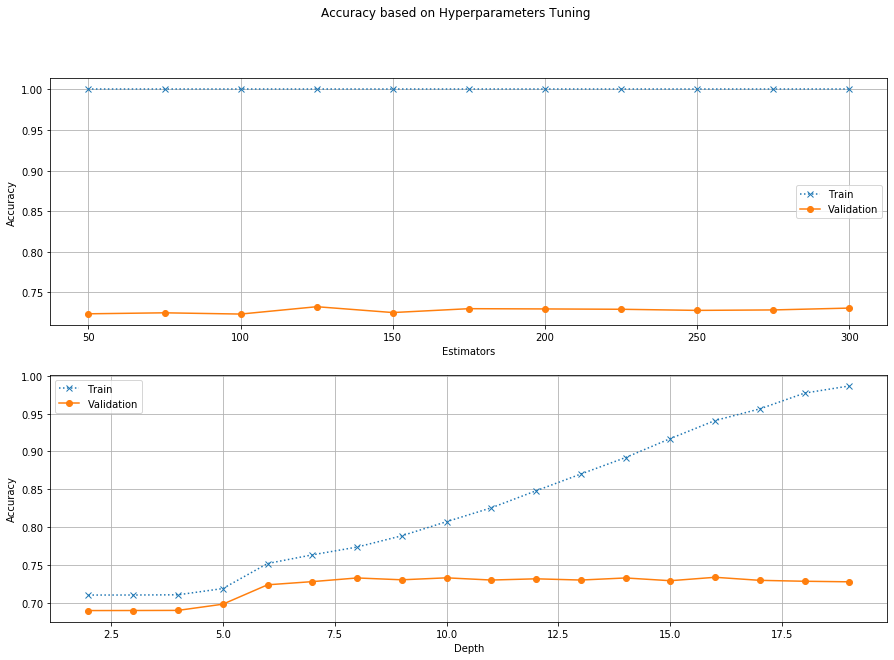

In [37]:
%%time
recursive_forest_best_features = valop.validate_forest_classifier(dataframe[features])

In [ ]:
'''from sklearn.feature_selection import RFE

rf_small = RandomForestClassifier(n_estimators=20)
selector = RFE(rf_small, 
                 step=1, # features removed at each step
                 n_features_to_select=1 # selected features
                )
fit = selector.fit(dataframe.loc[:, dataframe.columns != 'Winner'],  
                                                        dataframe['Winner'])
                                                        '''

In [ ]:
#accuracy_score(y_true=dataframe['Winner'], y_pred=rf.predict(fit.predict(dataframe.loc[:, dataframe.columns != 'Winner'])))